In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random

In [2]:
def generateSample(N):

    # generate X with shape (N,1) 
    # append ones to each x in X, then X will be of shape (N,2) 
    # generate Y with shape (N,1)
    
    X = np.random.rand(N,1)
    newcol = np.ones((N,1))
    X = np.append(X,newcol,axis=1)
    Y = np.random.rand(N,1)
    
    return X, Y

In [105]:
def fitModel_gradient(X, Y):
        
    # initialize weights W with shape (2,1) 
    # foreach epoch
    # 1. Calculate predictions P = X * W
    # 2. Calculate error = P - Y
    # 3. Calculate gradient = (X.T * error) / N
    # In this step, we are multiplying the input data by the error, and then dividing by the N because we're averaging
    # 4. Update weights  W = W - lr * gradient
    
    W = np.random.rand(2,1)
    lr = 0.0001 # this is a hyperparameter we can adjust
    n_epochs = 5
    
    for i in range(n_epochs):
        P = np.dot(X,W)
        err = P - Y
        grad = np.dot(X.T,err)/len(X)
        W = W - lr*grad
    
    return W
    
    
def fitModel_stochastic_gradient(X, Y):
    
    # initialize weights W with shape (2,1)
    # foreach epoch
    # Shuffle training samples (careful to shuffle X and Y in the same order!)
    # foreach sample xi,yi
    # 1. Calculate sample prediction pi =W0+W1 xi
    # 2. Calculate error = pi - yi
    # 3. Calculate gradient = xi * error 
    # 4. Update weights  W = W - lr * gradient
    
    w = np.random.rand(2,1)
    lr = 0.0001
    n_epochs = 10  
    
    for epoch in range(n_epochs):  
        Z = np.append(X,Y,axis=1)
        np.random.shuffle(Z)
        X = Z[:,0:2]
        Y = Z[:,2]
        Y = Y.reshape(len(Y),1)
        
        for i in range(len(X)):
            samp_pred = np.dot(w,X[i])
            err = samp_pred - Y[i]
            grad = X[i].T * err
            w = w - lr*grad
    
    return w

In [5]:
X,Y = generateSample(5)
lr = 0.0001
Z = np.append(X,Y,axis=1)
np.random.shuffle(Z)
X = Z[:,0:2]
Y = Z[:,2]
Y = Y.reshape(len(Y),1)
w = np.random.rand(1,2)
samp_pred = np.dot(w,np.reshape(X[1,:],(2,1)))
err = samp_pred - Y[1]
grad = X[1].T * err
w = w - lr*grad

print(X.shape)
print(Y.shape)
print(w.shape)
print(samp_pred.shape)
print(err.shape)
print(grad.shape)
print(w.shape)



(5, 2)
(5, 1)
(1, 2)
(1, 1)
(1, 1)
(1, 2)
(1, 2)


In [143]:
w = np.random.rand(2,1)
X = np.reshape(X[1,:],(2,1))
print(w.shape)
print(X.shape)


(2, 1)
(2, 1)


In [106]:
X,Y = generateSample(5)
fitModel_stochastic_gradient(X,Y)

print(samp_pred.shape)

ValueError: shapes (2,1) and (2,) not aligned: 1 (dim 1) != 2 (dim 0)

In [93]:
def plotModel(x, y, w):
    plt.plot(x[:,1], y, "x")
    plt.plot(x[:,1], x * w, "r-")
    plt.show()

ValueError: operands could not be broadcast together with shapes (5,2) (2,1) 

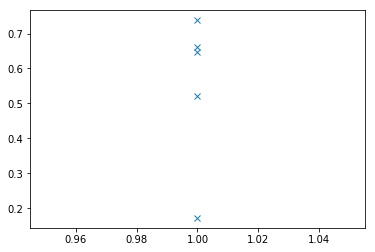

In [97]:
X, Y = generateSample(5)
w_gd = fitModel_gradient(X, Y)
w_sgd = fitModel_stochastic_gradient(X, Y)
plotModel(X,Y,w_gd)
plotModel(X,Y,w_sgd)